# Case 3. Medical text categorization
Cognitive Systems for Health Technology Applications<br>
Viljami Koho<br>
10.3.2018<br>
[Helsinki Metropolia University of Applied Sciences](http:/www.metropolia.fi/en)

## 1. Objectives

The aim of this assignment is to learn to use recurrent and 1D convolutional neural networks to categorize medical texts.

## 2. Processing raw data
Based on listing 6.8 (p. 189) Chollet: Deep Learning with Python, 2018.

In [1]:
import os
import time

ohsumed_dir = 'ohsumed-first-20000-docs/'
train_dir = os.path.join(ohsumed_dir, 'training')

# Creates two lists
labels = []
texts = []

# Generate a list L = ['C01', 'C02, ..., 'C023']
L = ['C{:02}'.format(n) for n in range(1, 23 + 1)]
for label_type in L:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        texts.append(f.read())
        f.close()
        i = L.index(label_type)
        labels.append(i)

## 3. Tokenize the text of the raw data
Based on listing 6.9 (p. 189)

-Preprocess word data into integer tensors<br>
-Each sample is zero-padded to lenght "maxlen"<br>
-Only "max_words" most frequent words are taken into account<br>

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

#Cuts off reviews after 300 words
maxlen = 300
#Considers only the top 20000 words in the dataset
max_words = 20000

tokenizer = Tokenizer(num_words = max_words)
# Forms the words to integer lists
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Using TensorFlow backend.


Found 30857 unique tokens


## 4. Shape the data and labels

In [3]:
from keras.utils.np_utils import to_categorical

data = pad_sequences(sequences, maxlen = maxlen)

labels = np.asarray(labels)
one_hot_labels = to_categorical(labels)


print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', one_hot_labels.shape)

Shape of data tensor: (10433, 300)
Shape of labels tensor: (10433, 23)


### Shuffle the data and labels

-Shuffle the training data<br>
-Splits the data into a training set and a validation set, but first shuffles the data<br>
-Shuffle is important when the data samples are ordered, for example all negative first, then all positive<br>

In [4]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
one_hot_labels = one_hot_labels[indices]

## 5. Build the model
Listing 6.7 (p. 187)

In [5]:
# Build and compile the network model

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, Dropout, LSTM

model = Sequential()
model.add(Embedding(max_words, 32, input_shape=(maxlen,)))
model.add(LSTM(100, dropout=0.2))
model.add(Dense(23, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 23)                2323      
Total params: 695,523
Trainable params: 695,523
Non-trainable params: 0
_________________________________________________________________


## 6. Train the model

In [6]:
import time

t1 = time.time()

# Fit the model to training data
history = model.fit(data, one_hot_labels,
                   epochs = 20,
                   batch_size = 32,
                   validation_split = 0.2)
t2 = time.time()
print('Elapsed time: {:.2f} seconds'.format((t2-t1)))

Train on 8346 samples, validate on 2087 samples
Epoch 1/20
8346/8346 [==============================] - 81s 10ms/step - loss: 2.8183 - acc: 0.1695 - val_loss: 2.8146 - val_acc: 0.1634
Epoch 2/20
8346/8346 [==============================] - 80s 10ms/step - loss: 2.7158 - acc: 0.1885 - val_loss: 2.6743 - val_acc: 0.2089
Epoch 3/20
8346/8346 [==============================] - 78s 9ms/step - loss: 2.5646 - acc: 0.2351 - val_loss: 2.6487 - val_acc: 0.2262
Epoch 4/20
8346/8346 [==============================] - 77s 9ms/step - loss: 2.4380 - acc: 0.2731 - val_loss: 2.6455 - val_acc: 0.2103
Epoch 5/20
8346/8346 [==============================] - 78s 9ms/step - loss: 2.3384 - acc: 0.2922 - val_loss: 2.6132 - val_acc: 0.2295
Epoch 6/20
8346/8346 [==============================] - 78s 9ms/step - loss: 2.2272 - acc: 0.3217 - val_loss: 2.6132 - val_acc: 0.2171
Epoch 7/20
8346/8346 [==============================] - 78s 9ms/step - loss: 2.1232 - acc: 0.3466 - val_loss: 2.6154 - val_acc: 0.2314
Epoch

## 7. Training results

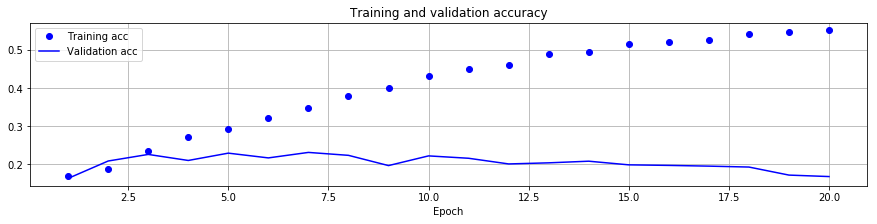

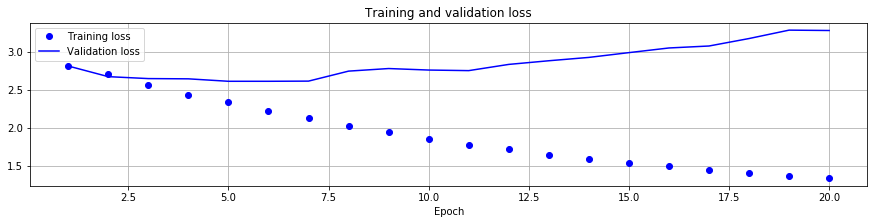

In [7]:
# Plot the results

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15, 3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid()
plt.xlabel('Epoch')
plt.legend()


plt.figure(figsize=(15, 3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid()
plt.xlabel('Epoch')
plt.legend()

plt.show()

- My first test <br>
    #epochs = 10,<br>
    #batch_size = 32,<br>
    #validation_split = 0.2)<br>

    #model.add(Embedding(max_words, 32, input_length=maxlen))<br>
    #model.add(Flatten())<br>
        
- At first I got the network acc near ~57 %, but I wasn't happy with the validation acc, because it was only 0,08 = ~8% which is bad... <br>
- After that I tried other parameters to get better results...<br>
- It didn't work distinctly<br>

----------------------------------------------------------------------------------------------------------------------------

- On my second test I tried some other parameters listed below...<br>
    #epochs = 20,<br>
    #batch_size = 64,<br>
    #validation_split = 0.2)<br>
    
    #model.add(Embedding(max_words, 32, input_length=maxlen))<br>
    #model.add(Flatten())<br>
    
- On my second test the acc was almost the same (~60%) and validation acc was a little bit higher than test #1 (0,125 = 12,5%)<br>
- Still I wasn't happy with the validation acc, I needed to get that higher...<br>

-----------------------------------------------------------------------------------------------------------------------------

- After my second test I decided to add dropout layer and see what happens--><br>
    #model.add(Dropout(0.3))<br>
    
- The result was still "horrible" arghh<br>

- Then I tried to add other dropout layer, because I was still thinking that the network was over fitting and thatswhy the validation accuracy results were decreasing...<br>

    -model.add(Dense(1024, activation = 'relu'))<br>
    -model.add(Dropout(0.3))<br>
    -model.add(Dense(256, activation = 'relu'))<br>
    -model.add(Dropout(0.2))<br>
    -model.add(Dense(len(L), activation = 'softmax'))<br>
    
    -history = model.fit(data, one_hot_labels,<br>
                   epochs = 20,
                   batch_size = 32,
                   validation_split = 0.2)
                
- No effort! Validation acc was still bad and not even close to the acc values...<br>

------------------------------------------------------------------------------------------------------------------------------

- I made still some changes... I decided to change maxlen and max_words values

- Cuts off reviews after 250 words
    maxlen = 250
    --> maxleng from 250 to 300

- Considers only the top 10000 words in the dataset
    max_words = 10000
    --> max_words from 10000 to 20000

 --> Not significant change in the outcome

------------------------------------------------------------------------------------------------------------------------------

- In my final test I tried to use LSTM layer to get better results and it seemed to work better than the one I used Dense layers only.<br>
- Now I can get better results than earlier --> acc: ~56% and val acc: ~18%<br>
- There seems to be still some over fitting --> the val acc is decreasing slowly<br>
- I tried to Google the problem and I found that:"In general a model that over fits can be improved by adding more dropout, or training and validating on a larger data set."<br>
- So I tried to add more dropout again.<br>

## Metrics results

In [8]:
# Calculate the predictions
predictions = model.predict(data)
y_pred = np.argmax(predictions, axis = 1)

In [9]:
predictions[0]

array([  3.77821713e-03,   2.81335600e-03,   4.77832131e-04,
         3.41359503e-03,   2.52247718e-03,   3.27448966e-03,
         2.23978492e-03,   1.50463283e-02,   3.42881237e-03,
         5.12583815e-02,   3.57225211e-03,   2.11064689e-04,
         2.36188248e-03,   6.30533695e-01,   1.65320223e-03,
         4.60611209e-02,   1.11599192e-02,   1.59679574e-03,
         9.91896261e-04,   2.57046567e-03,   7.59640560e-02,
         4.41237958e-03,   1.30658180e-01], dtype=float32)

In [10]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, recall_score

In [11]:
# Classification results per class
print(classification_report(labels, y_pred))

             precision    recall  f1-score   support

          0       0.41      0.58      0.48       423
          1       0.44      0.27      0.34       158
          2       0.44      0.28      0.34        65
          3       0.55      0.71      0.62      1163
          4       0.53      0.37      0.44       283
          5       0.62      0.41      0.49       588
          6       0.67      0.26      0.37       100
          7       0.53      0.42      0.47       473
          8       0.68      0.29      0.40       125
          9       0.57      0.44      0.50       621
         10       0.52      0.34      0.41       162
         11       0.49      0.65      0.56       491
         12       0.63      0.40      0.49       281
         13       0.59      0.73      0.65      1249
         14       0.37      0.32      0.34       215
         15       0.40      0.27      0.32       200
         16       0.41      0.51      0.46       295
         17       0.63      0.54      0.58   

In [12]:
# Confusion matrix
cm = confusion_matrix(labels, y_pred)
print(np.array2string(cm, max_line_width = 100))

[[244   4   1   6   8  16   1  18   0   5   1  10   1  12   6   1  10   0   0   5   7   2  65]
 [ 28  43   1  11   1   4   1   2   0   2   0   1   3   3   1   0  12   0   0  34   0   0  11]
 [  5   2  18   1   0   6   0   0   0   4   0   5   1   1   5   1   2   1   0   3   2   3   5]
 [ 12   3   0 826   5  14   4  14   5   6   2  94  10  15   9   3  12   7   4  35   3   1  79]
 [ 10   0   0   8 106   0   2   4   0  12   3   2   1   5  13   8  27   5   2   6  11   1  57]
 [ 30   3   0  63   4 240   0   2   0   9   0   9   1  14   3   0   3   6   0   5   8   1 187]
 [  6   1   4  28   1   0  26   2   2   1   0   1   0   3   0   3   9   2   1   1   1   0   8]
 [ 17   2   0  74   4   2   0 201   2   5   0   6   2  26   5   3   8   1   0  34   7   1  73]
 [  4   2   0  26   2   0   1   8  36   0   0   1   0   1   1   1  19   0   0   3   2   0  18]
 [ 10   1   0  34   8   5   0   6   1 276   1   8   4  51   3   8   9   7   2  22   8   1 156]
 [  3   2   5  12   7   0   2   1   0   6  55   0 

In [13]:
print(texts[indices[512]])

Detection of HIV in fetal central nervous system tissue.
 Neurological disease is a common finding in children with AIDS and in others without signs of disease but with evidence of congenital HIV-1 infection.
 To investigate the possibility that HIV-1 can infect fetal central nervous system (CNS) tissue and therefore possibly serve as the substrate for the abnormal neurodevelopment characteristic of pediatric AIDS, eight abortus CNS samples (one set of twins) from seven HIV-1-seropositive intravenous drug users (IVDUs) and eight control abortus CNS samples from eight HIV-1-seronegative IVDUs were analyzed for HIV-1 infection.
 HIV-1 nucleic acid was detected only after the use of polymerase chain reaction (PCR) in three of eight CNS samples from HIV-seropositive IVDUs but not in samples from seronegative subjects.
 In situ hybridization confirmed that HIV-1 DNA sequences were in cells in the CNS parenchyma of two of the three positive samples.
 This study demonstrates that HIV-1 can in

True class:  12
Predicted class: 20
Predictions per class:
[ 0.09  0.05  0.    0.01  0.01  0.01  0.    0.08  0.02  0.01  0.    0.
  0.04  0.    0.01  0.    0.11  0.    0.    0.24  0.28  0.    0.02]


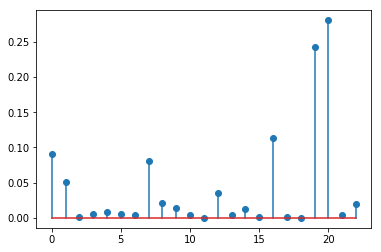

In [14]:
print('True class: ', labels[512])
print('Predicted class:', y_pred[512])
print('Predictions per class:')
print(np.array2string(predictions[512], precision = 2))

plt.stem(predictions[512])
plt.show()

In [15]:
np.__version__

'1.12.1'

In [16]:
#Download and preprocess test data

test_dir = os.path.join(ohsumed_dir, 'test')

test_labels = []
test_texts = []

for label_type in L:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        f = open(os.path.join(dir_name, fname))
        test_texts.append(f.read())
        f.close()
        test_labels.append(L.index(label_type))

test_sequences = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
test_labels = np.asarray(test_labels)
y_test = to_categorical(test_labels)

In [17]:
#Evaluate model with test data

model.evaluate(x_test, y_test)

12733/12733 [==============================] - 28s 2ms/step


[2.63456850665855, 0.28665671879269849]

## 8. Results and discussion

- To get better results I tried to do some tricks.<br>
- I changed the parameters over and over again and I also tried to add dropout layers because of over fitting...<br>
- At first I guess the network was over fitting, because the val acc was declining quite powerfully.<br>
- In my opinion the dropout layers seems not to work properly, I dont know why...<br>
- The LSTM layer seemed to work better than the Dense layer in my opinion.

## 9. Conclusions

- To be honest for me it was hard to get good results...<br>
- Eventually I'm pretty happy with the result.<br>
- taking into account my skill level I couldn't do this any better.<br>